<a href="https://colab.research.google.com/github/lagaleno/computational_intelligence/blob/main/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utils

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# global constants

# Limits
UPPER_LIMIT = 1
LOWER_LIMIT = -1

In [78]:
def plotTargetFunction(function, classified_points, title):
  fig, ax = plt.subplots()
  ax.set_xlim(LOWER_LIMIT, UPPER_LIMIT)
  ax.set_ylim(LOWER_LIMIT, UPPER_LIMIT)
  for point in classified_points:
    plt.scatter(point['coordinates']['x'], point['coordinates']['y'], color=point['color'])
  ax.axline(function['Point-A'], function['Point-B'])
  plt.title(title)
  plt.show

In [47]:
def plotPerceptron(weight, classified_points):
  x = np.array([LOWER_LIMIT, UPPER_LIMIT])
  y = -(weight[1]/weight[2])*x - (weight[0]/weight[2])
  plt.plot(x, y, color="black")
  plt.show

# Defined Target Function

In [5]:
def generateTargetFunction():
  '''
    Return a dictionary that represents cordinates (x, y)
    of two points (point-a and point-b) randomly chosen that will form the line of the target function
  '''
  point_a = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  point_b = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  
  return {
      'Point-A': point_a,
      'Point-B': point_b,
  }

In [6]:
def generatePoints(n):
  '''
    Return a two dimensional array with points coordinates generated randomly [[x1, y1], [x2, y2], ... [xn, yn]]
  '''
  points = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, (n, 2))

  return points

In [7]:
def classify(target_function, points):
  '''
  Return:
  [
    {
      coordinates:{
        x: ...,
        y: ...,
      },
      classification: -1 | +1,
      color: red (-1) | green (+1)
    },
    ...
  ]
  '''
  res = []
  tf_vector = np.subtract(target_function['Point-A'], target_function['Point-B'])
  # do cross product to see "where" the point is in reference with the target function vector
  for point in points:
    point_vector = np.subtract(target_function['Point-A'], point)
    corss_product = np.cross(tf_vector, point_vector)
    sign = np.sign(corss_product)
    res.append({
        'coordinates': {
            'x': point[0],
            'y': point[1]
        },
        'classification': sign,
        'color': 'green' if sign > 0 else ('red' if sign < 0 else 'orange'),
    })
  
  return res;



In [8]:
def useTargetFunction(n):
  '''
    Recieve size of data and return a dictionary with:
    {
      target_function: {
        point_a,
        point_b
      },
      classified_points: {
        coordinate: {
          x: ...,
          y: ...,
        },
        classification: -1 | +1
        color: red | green
      }
    }
  '''

  # Define the tareget Function (my line)
  target_function = generateTargetFunction()

  # Given n random points (my data)
  points = generatePoints(n)

  # Classify this points as +1 ou -1 if above or not
  classified_points = classify(target_function, points)

  return {
      'target_function': target_function,
      'classified_points': classified_points,
  }

# Perceptron Learning Algorithm (PLA)

In [9]:
def getMisclassified(w, classified_points):
  '''
    Returns an array of dictionaries with points that were misclassified
    [
      {
        coordinate: {
          x: ...,
          y: ...,
        },
        classification: -1 | +1
        color: red | green
      }
    ]
  '''
  misclassified = []
  for data in classified_points:
    point = np.array([1, data['coordinates']['x'], data['coordinates']['y']])
    hx = np.sign(np.dot(w, point))
    # hx = np.sign(np.array(w) @ point)
    # check misclassification
    if hx != data['classification']:
      misclassified.append(data)
  
  return misclassified

In [10]:
def updateWeight(w, point):
  '''
    Returns a numpy array with newy weights [a, b, c, d]
  '''
  coordinates = np.array([1, point['coordinates']['x'], point['coordinates']['y']])
  new_weight = np.add(w, np.multiply(point['classification'], coordinates))
  return new_weight

In [11]:
def perceptronAlgorithm(classified_points):
  '''
    Return the weight that best aproximate and count of iterations
  '''
  # first iteration (w = 0)
  w = np.array([0,0,0])
  misclassified = getMisclassified(w, classified_points)
  cont = 0

  # loop over and check if classification is correct
  # if not correct store misclassified points and choose to loop over again
  while len(misclassified) != 0:
    # pick a missclassified point
    misclassified_point = random.choice(misclassified)
    # update o w
    w = updateWeight(w, misclassified_point)
    # try again
    misclassified = getMisclassified(w, classified_points)
    cont = cont + 1 # count which interation is

  return w, cont


In [12]:
def usePerceptron(classified_points):
  return perceptronAlgorithm(classified_points)

# Simulation

In [52]:
def simulation(n, iteration):
  '''
    Recieve n (number of points for training)
    and return the mean of iterations
  '''
  iteration_counts = []
  i = 0
  while i < iteration:
    res = useTargetFunction(n)
    w, iteration_count = usePerceptron(res['classified_points'])
    iteration_counts.append(iteration_count)
    i = i + 1 # Next simulation
  
  mean = np.sum(iteration_counts)/len(iteration_counts)

  # Plot the last iteration just for example
  plotTargetFunction(res['target_function'], res['classified_points'], "Pontos de Treino")
  plotPerceptron(w, res['classified_points'])

  return 'A média de iterações = ' + str(mean)

In [80]:
def testAccuracy(n_train, n_test, iteration = 1000):
  '''
    Recieve number of points for training (n_train), number of points for testing (n_test) and total iteration for simulation
    Return the mean error of misclassified testing points
  '''
  arr_count_not_equal = []
  j = 0
  while j < iteration:
    ## Train ##

    # Get correct classification
    res_train = useTargetFunction(n_train)

    # Do perceptron to get Weights
    w, iteration_count = usePerceptron(res_train['classified_points'])

    ## Test ##

    # randomly generate points
    points = generatePoints(n_test)

    # Get it's correct classification
    test_points_classified = classify(res_train['target_function'], points)

    # Dot product to see perceptron classification and compare with the target_function classification
    count_not_equal = 0
    for i in range(len(points)):
      temp = np.array([1, points[i][0], points[i][1]])
      hx = np.sign(np.dot(w, temp))
      if test_points_classified[i]['classification'] != hx:
        count_not_equal = count_not_equal + 1
    arr_count_not_equal.append(count_not_equal/n_test)
    j = j + 1 # next simulation

  # Plot training (last iteration data)
  plotTargetFunction(res_train['target_function'], res_train['classified_points'], "Pontos de Treino")
  plotPerceptron(w, res_train['classified_points'])
  
  # Plot testing (last iteration data)
  plotTargetFunction(res_train['target_function'], test_points_classified, "Pontos de Teste")
  plotPerceptron(w, test_points_classified)

  mean_not_equal = np.sum(arr_count_not_equal)/len(arr_count_not_equal)
  return 'a média de pontos que não coincidiram a classificação = ' + str(mean_not_equal)

## Questão 7

'A média de iterações = 9.447'

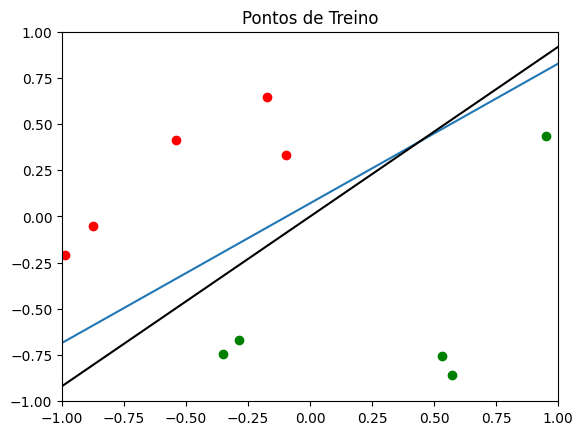

In [84]:
simulation(10, 1000)

## Questão 8

'a média de pontos que não coincidiram a classificação = 0.1039046'

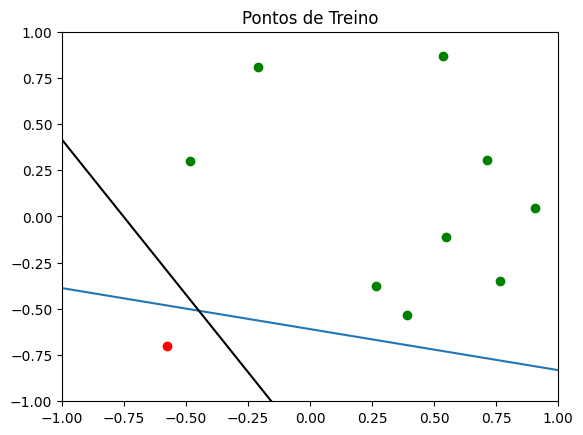

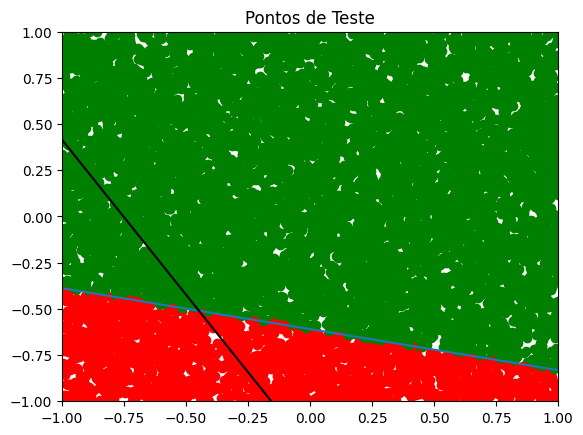

In [89]:
testAccuracy(10, 10000, 1000)

## Questão 9

'A média de iterações = 105.123'

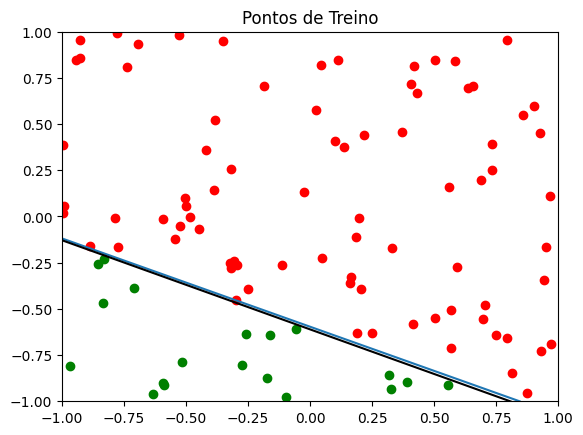

In [86]:
simulation(100, 1000)

## Questão 10

'a média de pontos que não coincidiram a classificação = 0.0140121'

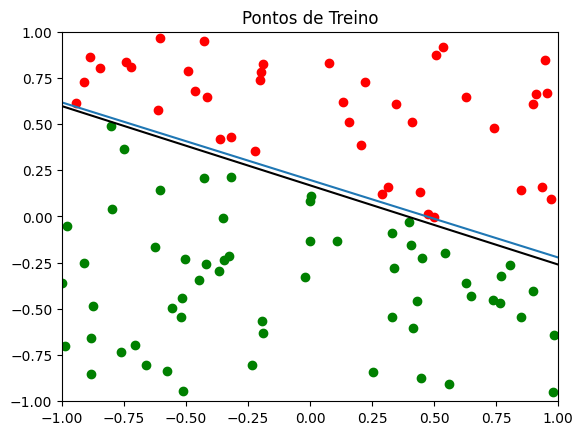

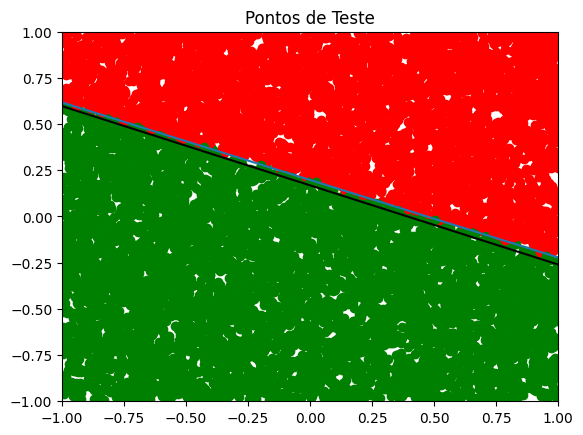

In [88]:
testAccuracy(100, 10000, 1000)